#
<b><center><h1>Human Development Index Report Analysis</h1></center></b> <br>
The Human Development Index (HDI) is a composite statistic that measures a country's social and economic development. In this project, we aim to analyze and visualize HDI data to gain insights into global development trends.

<h1><u>Data Loading and Data Manipulation</u></h1>

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

pd.options.display.max_columns=10
pd.options.display.max_rows=200


In [2]:
#  Loading the Dataset

df=pd.read_csv("HDR21-22_Statistical_HDI_Table.csv")
display(df.head())

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,0.967,84.3,16.6,13.9,"69,433",6,1
1,2,Norway,0.966,83.4,18.6,13.1,"69,190",6,2
2,3,Iceland,0.959,82.8,19.1,13.8,"54,688",16,4
3,4,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,"62,486",6,3
4,5,Denmark,0.952,81.9,18.8,13.0,"62,019",6,8


In [3]:
# Renaming Columns
df.rename(columns= {'Human Development Index (HDI) ':'Human_Development_Index_(HDI)','Life expectancy at birth':'Life_expectancy_at_birth','Expected years of schooling':'Expected_years_of_schooling','Mean years of schooling':'Mean_years_of_schooling','Gross national income (GNI) per capita':'Gross_National_Income','HDI rank.1':'HDI_2021'}, inplace = True)
display(df.head())

,HDI rank,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,GNI per capita rank minus HDI rank,HDI_2021
0,1,Switzerland,0.967,84.3,16.6,13.9,"69,433",6,1
1,2,Norway,0.966,83.4,18.6,13.1,"69,190",6,2
2,3,Iceland,0.959,82.8,19.1,13.8,"54,688",16,4
3,4,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,"62,486",6,3
4,5,Denmark,0.952,81.9,18.8,13.0,"62,019",6,8


In [4]:
# converting Gross_National_Income from string to float for plotting.
df.Gross_National_Income = df.Gross_National_Income.str.replace(',','').astype(float)

In [5]:
df.head()

,HDI rank,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,GNI per capita rank minus HDI rank,HDI_2021
0,1,Switzerland,0.967,84.3,16.6,13.9,69433.0,6,1
1,2,Norway,0.966,83.4,18.6,13.1,69190.0,6,2
2,3,Iceland,0.959,82.8,19.1,13.8,54688.0,16,4
3,4,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,62486.0,6,3
4,5,Denmark,0.952,81.9,18.8,13.0,62019.0,6,8


In [6]:
# Organizing the countries with respect to continent.

Continent = {'Africa' : {"Côte d'Ivoire", 'Congo','Saint Lucia', 'Gambia', 'Egypt', 'Congo', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 
                         'Comoros', 'Congo/Republic of the Congo', 'Congo (Democratic Republic of the)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 
                         'Eswatini (Kingdom of)', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 
                         'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
                         'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania (United Republic of)', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'},
             'Asia' : {'Syrian Arab Republic','Korea (Republic of)', 'Yemen, Rep.', "Lao People's Democratic Republic", 'Kyrgyz Republic', 'Hong Kong, China (SAR)', 'Macao SAR, China', "Korea, Dem. People's Rep.", 'Iran, Islamic Rep.', 'Uzbekistan', 'Korea, Rep.', 'Brunei Darussalam', 'Afghanistan', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'British Indian Ocean Territory', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
                       'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
                       'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine, State of', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 
                       'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekstan', 'Viet Nam', 'Yemen'},
             'Europe' : {'Sint Maarten (Dutch part)','Moldova (Republic of)', 'Russian Federation', 'Slovak Republic', 'Faroe Islands', 'British Virgin Islands', 'Isle of Man', 'Channel Islands', 'Kosovo', 'Czech Republic', 'Albania', 'Andorra', 'Armenia', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia/Chech Republic', 'Denmark', 'Estonia',
                         'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 
                         'Monaco', 'Montenegro', 'Netherlands','Czechia', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
                         'Switzerland', 'Türkiye', 'Ukraine', 'United Kingdom', 'Vatican City'}, 
             'North America' : {'St. Vincent and the Grenadines','Bahamas', 'Turks and Caicos Islands', 'St. Martin (French part)', 'Puerto Rico', 'St. Kitts and Nevis', 'Cayman Islands', 'Curacao', 'Nicaragua', 'Virgin Islands (U.S.)', 'St. Lucia', 'Bahamas, The', 'United States', 'Bermuda', 'Antigua and Barbuda', 'Bahamas, the', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti',
                                'Honduras', 'Jamaica', 'Mexico', 'Panama', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'Unided States of America'},
             'South America' : {'Venezuela (Bolivarian Republic of)', 'Aruba', 'Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'}, 
             'Oceania' : {'French Polynesia', 'Micronesia (Federated States of)', 'Guam', 'New Caledonia', 'American Samoa', 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'}}

In [7]:
# Function to add the respective continent region to each country

def return_continent(row):
    try:
        for continent in Continent.keys():
            if row['Country'] in Continent[continent]:
                return continent
    except:
        return "Others"

df['Continent']=df.apply(return_continent,axis=1)  
df.head()

,HDI rank,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,GNI per capita rank minus HDI rank,HDI_2021,Continent
0,1,Switzerland,0.967,84.3,16.6,13.9,69433.0,6,1,Europe
1,2,Norway,0.966,83.4,18.6,13.1,69190.0,6,2,Europe
2,3,Iceland,0.959,82.8,19.1,13.8,54688.0,16,4,Europe
3,4,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,62486.0,6,3,Asia
4,5,Denmark,0.952,81.9,18.8,13.0,62019.0,6,8,Europe


In [8]:
# Function to view the datasets Continent wise
def Continent_wise(continent):
    Continent_wise=df.loc[df.Continent==continent]
    return Continent_wise


<h1><b><u>View the Dataset Continent wise </u></b></h1>

In [43]:
# View the datasets Continent wise
value=input("Enter the continent region :")
con=Continent_wise(value).sort_values(by=['HDI rank'])
n = int(input("Enter the no of rows to be displayed: "))
con.head(n)

Enter the continent region :Asia
Enter the no of rows to be displayed: 5


,HDI rank,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,GNI per capita rank minus HDI rank,HDI_2021,Continent
3,4,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,62486.0,6,3,Asia
8,9,Singapore,0.949,84.1,16.9,11.9,88761.0,-6,10,Asia
16,17,United Arab Emirates,0.937,79.2,17.2,12.8,74104.0,-11,17,Asia
18,19,Korea (Republic of),0.929,84.0,16.5,12.6,46026.0,10,20,Asia
23,24,Japan,0.920,84.8,15.5,12.7,43644.0,9,22,Asia


In [10]:
# Function to view the datasets Country wise
def country_wise(country):
    Country_wise=df.loc[df.Country==country]
    return Country_wise


<h1><b><u>View the Dataset Country wise </u></b></h1>

In [44]:
# View the datasets Country wise
value1=input("Enter the country name :")
coun=country_wise(value1).sort_values(by=['HDI rank'])
coun.head()

Enter the country name :India


,HDI rank,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,GNI per capita rank minus HDI rank,HDI_2021,Continent
133,134,India,0.644,67.7,12.6,6.6,6951.0,-6,135,Asia


In [12]:
# Changing the order of columns 
dff=df.copy()
dff = dff[['HDI rank','Continent','Country','Human_Development_Index_(HDI)','Life_expectancy_at_birth','Expected_years_of_schooling','Mean_years_of_schooling','Gross_National_Income','HDI_2021']]
dff.head()  

,HDI rank,Continent,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,HDI_2021
0,1,Europe,Switzerland,0.967,84.3,16.6,13.9,69433.0,1
1,2,Europe,Norway,0.966,83.4,18.6,13.1,69190.0,2
2,3,Europe,Iceland,0.959,82.8,19.1,13.8,54688.0,4
3,4,Asia,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,62486.0,3
4,5,Europe,Denmark,0.952,81.9,18.8,13.0,62019.0,8


<b><u><h1>Descriptive statistics</h1></u></b>

In [13]:
#  functions


def median_dff(dff):
    median = dff.iloc[:,[3,4,5,6,7]].median()
    return median

def mean_dff(dff):
    mean = dff.iloc[:,[3,4,5,6,7]].mean()
    return mean

def data_info(dff) :   
    
    # Dataset preview 
    print("1. Dataset Preview \n")
    display(dff.head())
    print("-------------------------------------------------------------------------------\n")
    
    # Rows and Columns imformation
    print("2.Rows and Column Imformation \n")
    print(f"Dataset have {dff.shape[0]} rows and {dff.shape[1]} columns")
    print("\n") 
    print(f"Dataset Column name : {dff.columns.values}")
    print("\n")
    print("-------------------------------------------------------------------------------\n")
    
    print("3. Mean of our data: \n")
    display(mean_dff(dff))
    print("-------------------------------------------------------------------------------\n") 
    
    print("4. Median of our data: \n")
    display(median_dff(dff))
    print("-------------------------------------------------------------------------------\n")
    

In [14]:
data_info(dff)

1. Dataset Preview 



,HDI rank,Continent,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,HDI_2021
0,1,Europe,Switzerland,0.967,84.3,16.6,13.9,69433.0,1
1,2,Europe,Norway,0.966,83.4,18.6,13.1,69190.0,2
2,3,Europe,Iceland,0.959,82.8,19.1,13.8,54688.0,4
3,4,Asia,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,62486.0,3
4,5,Europe,Denmark,0.952,81.9,18.8,13.0,62019.0,8


-------------------------------------------------------------------------------

2.Rows and Column Imformation 

Dataset have 195 rows and 9 columns


Dataset Column name : ['HDI rank' 'Continent' 'Country' 'Human_Development_Index_(HDI)'
 'Life_expectancy_at_birth' 'Expected_years_of_schooling'
 'Mean_years_of_schooling' 'Gross_National_Income' 'HDI_2021']


-------------------------------------------------------------------------------

3. Mean of our data: 



Human_Development_Index_(HDI)        0.723741
Life_expectancy_at_birth            71.930769
Expected_years_of_schooling         13.562371
Mean_years_of_schooling              9.011917
Gross_National_Income            21057.300518
dtype: float64

-------------------------------------------------------------------------------

4. Median of our data: 



Human_Development_Index_(HDI)        0.74
Life_expectancy_at_birth            72.30
Expected_years_of_schooling         13.35
Mean_years_of_schooling              9.40
Gross_National_Income            12361.00
dtype: float64

-------------------------------------------------------------------------------



<h1><b><u><center>Data Visualization and Interpretation</center></u></b></h1>

# Continent wise distribution of countries

Text(0.5, 1.0, 'Countries distributed in Continents')

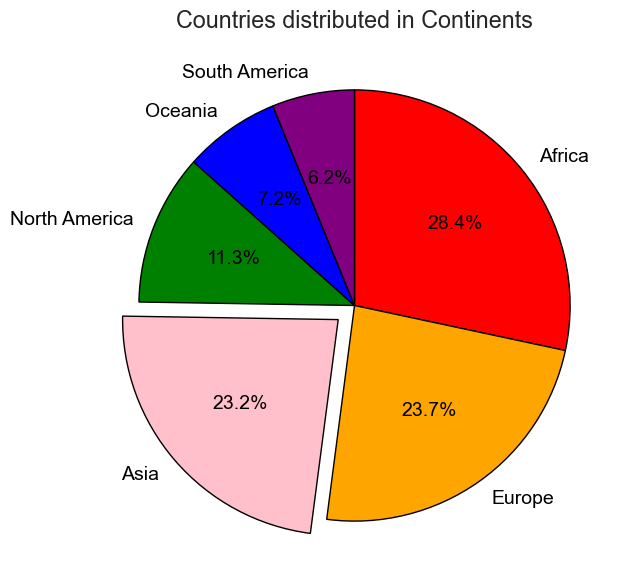

In [55]:
# value counts for each continent
continent_counts = dff['Continent'].value_counts()
# Attributes for the pie chart
labels = continent_counts.index
explode = [0.1 if label == 'Asia' else 0 for label in labels]
colors = ['red', 'orange', 'pink', 'green', 'blue', 'purple', 'gray']
wedgeprops = {'edgecolor': 'black'}
textprops = {'color' : 'black','fontsize': 14}
plt.figure(figsize=(10,7))
#  pie chart with the specified attributes
plt.pie(continent_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', startangle=90, counterclock=False,
        wedgeprops=wedgeprops, textprops=textprops,)

# Title of the pie chart
plt.title('Countries distributed in Continents')

# Income and Human Development Index Correlation

Scatter plot that shows the relationship between the <b><i>Gross_National_Income</i></b> and <b><i>Human_Development_Index_(HDI)</i></b> columns of HDI. 

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

Text(0.5, 1.0, 'Income and HDI correlation')

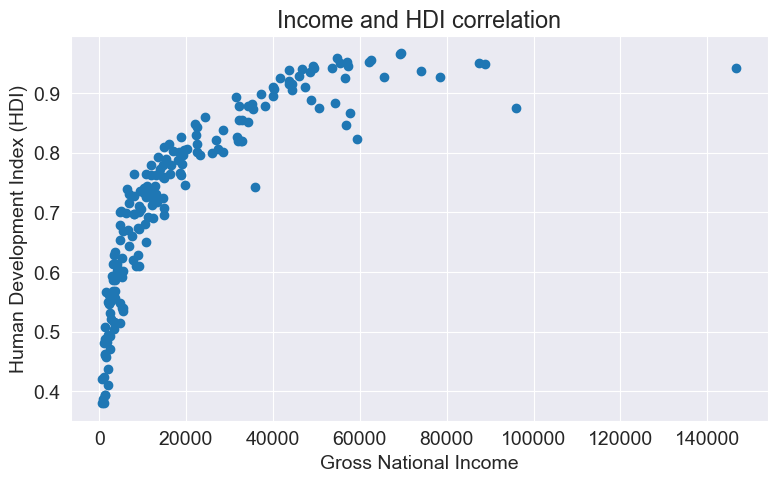

In [16]:
plt.scatter(x = dff["Gross_National_Income"],y = dff["Human_Development_Index_(HDI)"])

plt.xlabel('Gross National Income')
plt.ylabel('Human Development Index (HDI)')
plt.title('Income and HDI correlation')

<b>Insights</b>
<ul>
    <li>Based on the scatter plot, we can observe a positive correlation between HDI and GNI per capita. This means that as the GNI per capita increases, the HDI also tends to increase. </li>
    <li>There is a clear positive trend between HDI and GNI per capita, indicating that countries with higher GNI per capita tend to have higher HDI values.</li>
    <li>The relationship is not perfectly linear, suggesting that other factors, such as life expectancy and education, also play a role in determining a country's HDI.</li>
    <li>There is a group of low-HDI countries with GNI per capita below $10,000, suggesting that improving economic development is a key challenge for these countries in improving their HDI.</li>
    
</ul>

# Relationship between life expectancy at birth and human development index.

Scatter plot to visualize the correlation between two variables: life expectancy at birth and human development index (HDI). 

Text(0.5, 1.0, 'Life expectancy and HDI correlation')

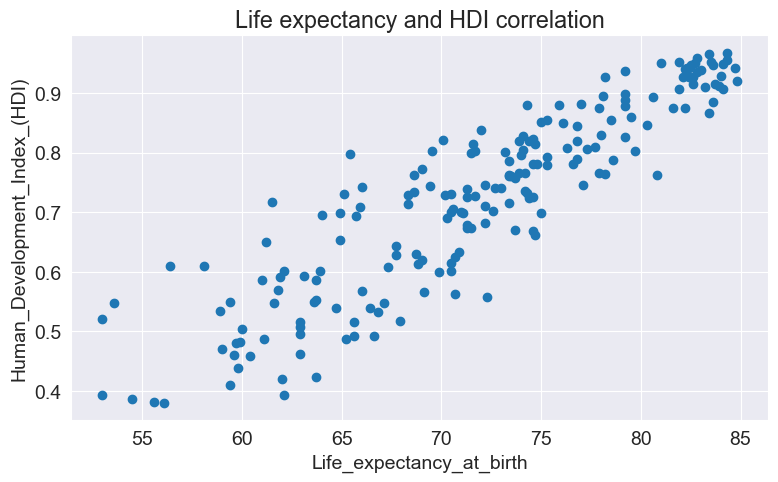

In [17]:
plt.scatter(
                    x = dff["Life_expectancy_at_birth"],
                    y = dff["Human_Development_Index_(HDI)"]
)
plt.xlabel('Life_expectancy_at_birth')
plt.ylabel('Human_Development_Index_(HDI)')
plt.title('Life expectancy and HDI correlation')

<b>Insights</b>
<ul>
    <li>Based on the scatter plot, we can observe a positive correlation between HDI and Life expectancy at birth. This means that as the HDI increases, the Life expectancy at birth also tends to increase.
    </li>
    <li>Most countries have a life expectancy of at least 70 years, indicating that this is a common threshold for developed countries. However, some countries, for example countries of Africa have lower life expectancy due to factors such as poor health infrastructure,malnutrition,
unhygienic enviroment and several other factors. </li>
    <li>There are some countries, such as Japan,Singapore, that have longer life expectancy than their HDI rank would suggest, indicating that these countries have strong performance in healthcare  </li>
    <li> Conversely, there are some countries, such as Kuwait, Saudi Arabia, and the United Arab Emirates, that have lower life expectancy than their HDI rank would suggest that these countries have room for improvement in healthcare and other factors that contribute to longevity.</li>
    
</ul>

# Relationship between Mean years of schooling  and human development index.

Scatter plot to visualize the correlation between two variables: Mean years of schooling and human development index (HDI).

Text(0.5, 1.0, 'Mean years of schooling and HDI correlation')

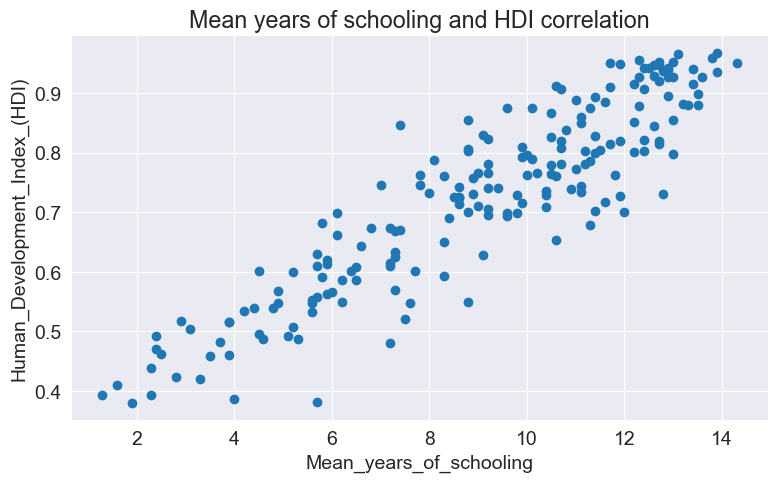

In [18]:
plt.scatter(
                    x = dff["Mean_years_of_schooling"],
                    y = dff["Human_Development_Index_(HDI)"], 
)
plt.xlabel('Mean_years_of_schooling')
plt.ylabel('Human_Development_Index_(HDI)')
plt.title('Mean years of schooling and HDI correlation')

<b>Insights</b>
<ul>
    <li>Upon examining the scatter plot, a positive correlation between Mean years of schooling and HDI becomes apparent. This implies that as HDI increases, Mean years of schooling also tends to rise.</li>
    <li>This relationship makes sense as a higher number of years spent in schooling can contribute to an individual's capabilities, leading to overall development and a higher HDI ranking.</li>
    <li>Interestingly, a considerable number of countries demonstrate a Mean years of schooling around 12 years, indicating a common educational benchmark among nations with higher HDI.</li>
    <li>Countries aiming to improve their HDI ranking could focus on increasing access to quality education, ensuring that more people complete their education, and enhancing the overall standard of schooling.</li>
</ul>

# Gross National Income among countries of different continent

<Axes: xlabel='Gross_National_Income', ylabel='Count'>

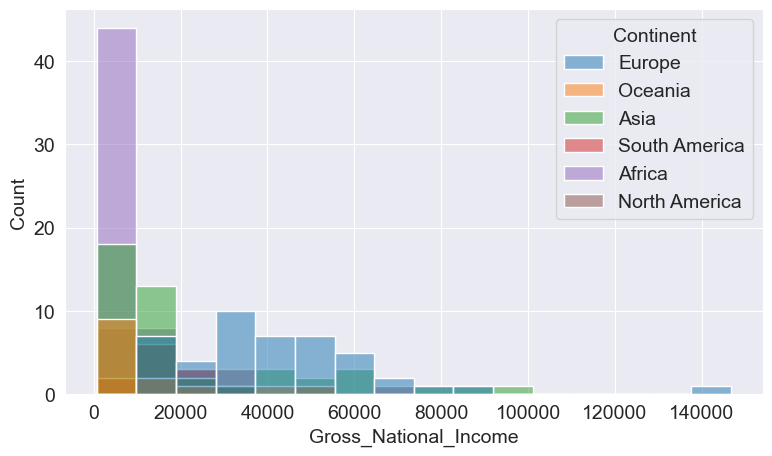

In [42]:
sns.histplot(x = dff.Gross_National_Income, hue = dff["Continent"])

# Mean Years of schooling among countries of different continent

<Axes: xlabel='Mean_years_of_schooling', ylabel='Count'>

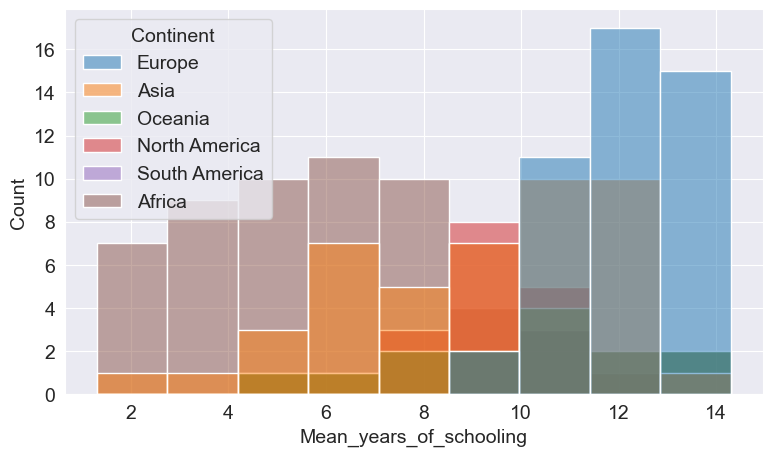

In [21]:
sns.histplot(x = dff.Mean_years_of_schooling, hue = dff["Continent"])

<Axes: xlabel='Life_expectancy_at_birth', ylabel='Count'>

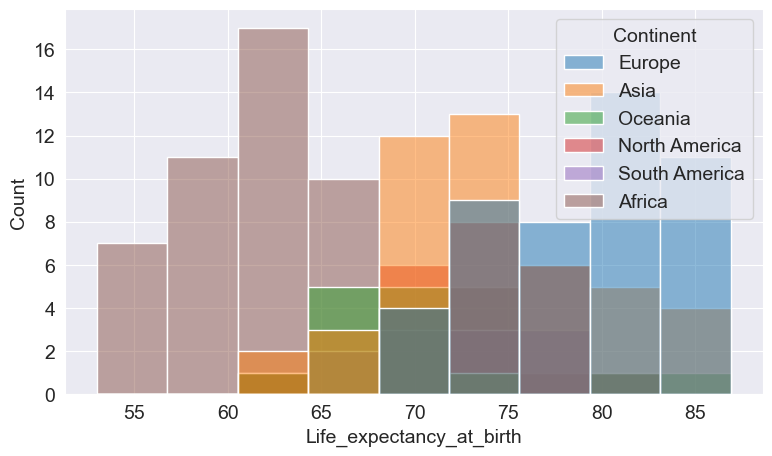

In [22]:
sns.histplot(x = dff.Life_expectancy_at_birth, hue = dff["Continent"])

<Axes: xlabel='HDI rank', ylabel='HDI_2021'>

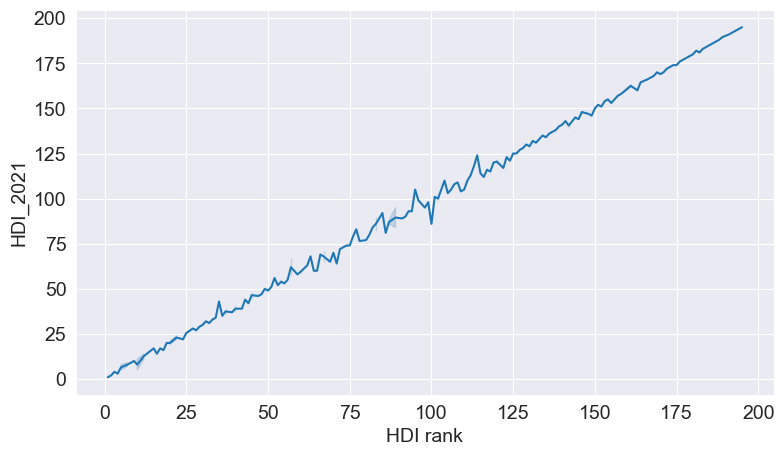

In [23]:
sns.lineplot(x = dff['HDI rank'], y = dff['HDI_2021'])

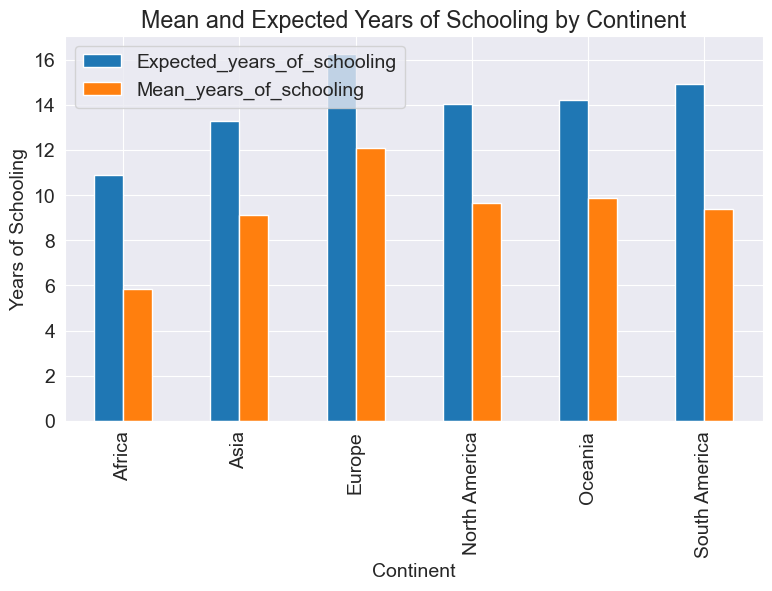

In [25]:

# Group the data by region and calculate the mean and expected years of schooling
grouped = dff.groupby('Continent')[['Expected_years_of_schooling', 'Mean_years_of_schooling']].mean()

# Create a grouped bar chart
grouped.plot(kind='bar')

# Set the axis labels and title
plt.xlabel('Continent')
plt.ylabel('Years of Schooling')
plt.title('Mean and Expected Years of Schooling by Continent')

# Show the plot
plt.show()

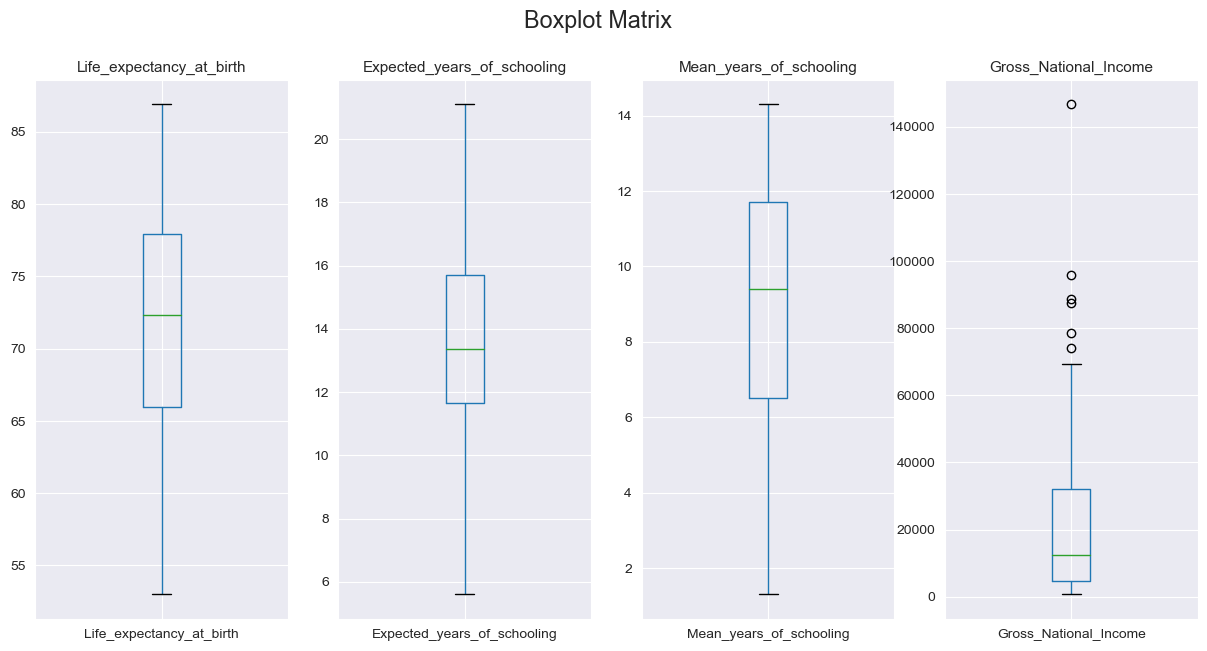

In [51]:

# The variables for the boxplot matrix
vars = ['Life_expectancy_at_birth', 'Expected_years_of_schooling', 'Mean_years_of_schooling','Gross_National_Income']

# The boxplot matrix
fig, axes = plt.subplots(nrows=1, ncols=len(vars), figsize=(15,7))

for i, var in enumerate(vars):
    dff.boxplot(column=var, ax=axes[i], fontsize=10)
    axes[i].set_title(var, fontsize=11)

# Set the overall title
plt.suptitle('Boxplot Matrix')

# Show the plot
plt.show()

<b>Insights</b>
<ul>
    <li>BOX plot is used to check the skewness. If Skewness is positive the that is a good sign. Positive Skewness means majority of countries are above the median value which is good sign. If Skewness is negative then it is not a good sign. This shows that majority of countries are below the median value. 
</li>
    <li>In Life Expectency box plot we can see that countries are equally distributed on both side of median. The expected years of schooling and GNI shows positive skewness means more countries are above the median value which is good sign. Mean Years of schooling it is negative skewness which is not a good sign means more countries are below the median value.</li>
   
</ul>

In [27]:
print('\nCountries below mid-low HDI mark = ',dff[dff['Human_Development_Index_(HDI)'] < 0.699].value_counts().sum(),' Countries\n')


Countries below mid-low HDI mark =  74  Countries



In [28]:
dff[dff['Human_Development_Index_(HDI)'] < 0.699].sort_values('Human_Development_Index_(HDI)', ascending=False).head(10) # 1st 10 countries

,HDI rank,Continent,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,HDI_2021
119,120,South America,Bolivia (Plurinational State of),0.698,64.9,15.0,9.8,7988.0,119
120,120,Africa,Morocco,0.698,75.0,14.6,6.1,7955.0,122
121,122,Oceania,Nauru,0.696,64.0,12.6,9.2,14939.0,117
122,123,Africa,Gabon,0.693,65.7,12.4,9.6,11194.0,123
123,124,South America,Suriname,0.690,70.3,11.0,8.4,12310.0,121
124,125,Asia,Bhutan,0.681,72.2,13.1,5.8,10625.0,125
125,126,Asia,Tajikistan,0.679,71.3,10.9,11.3,4807.0,125
126,127,North America,El Salvador,0.674,71.5,11.9,7.2,8886.0,127
127,128,Asia,Iraq,0.673,71.3,12.2,6.8,9092.0,128
128,129,Asia,Bangladesh,0.670,73.7,11.9,7.4,6511.0,130


In [29]:
df_sorted = dff.sort_values('HDI rank', ascending=True)
# Print the top 5 and bottom 5 countries by HDI 2021
print("Top 5 countries by HDI 2021:")
display(df_sorted.head(5))
print("\nBottom 5 countries by HDI 2021:")
display(df_sorted.tail(5))

Top 5 countries by HDI 2021:


,HDI rank,Continent,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,HDI_2021
0,1,Europe,Switzerland,0.967,84.3,16.6,13.9,69433.0,1
1,2,Europe,Norway,0.966,83.4,18.6,13.1,69190.0,2
2,3,Europe,Iceland,0.959,82.8,19.1,13.8,54688.0,4
3,4,Asia,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,62486.0,3
4,5,Europe,Denmark,0.952,81.9,18.8,13.0,62019.0,8



Bottom 5 countries by HDI 2021:


,HDI rank,Continent,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,Expected_years_of_schooling,Mean_years_of_schooling,Gross_National_Income,HDI_2021
190,191,Africa,Central African Republic,0.387,54.5,7.3,4.0,869.0,191
191,192,Africa,South Sudan,0.381,55.6,5.6,5.7,691.0,192
192,193,Africa,Somalia,0.380,56.1,7.6,1.9,1072.0,193
193,194,None,Korea (Democratic People's Rep. of),NaN,73.6,NaN,NaN,NaN,194
194,195,Europe,Monaco,NaN,86.9,18.7,NaN,NaN,195


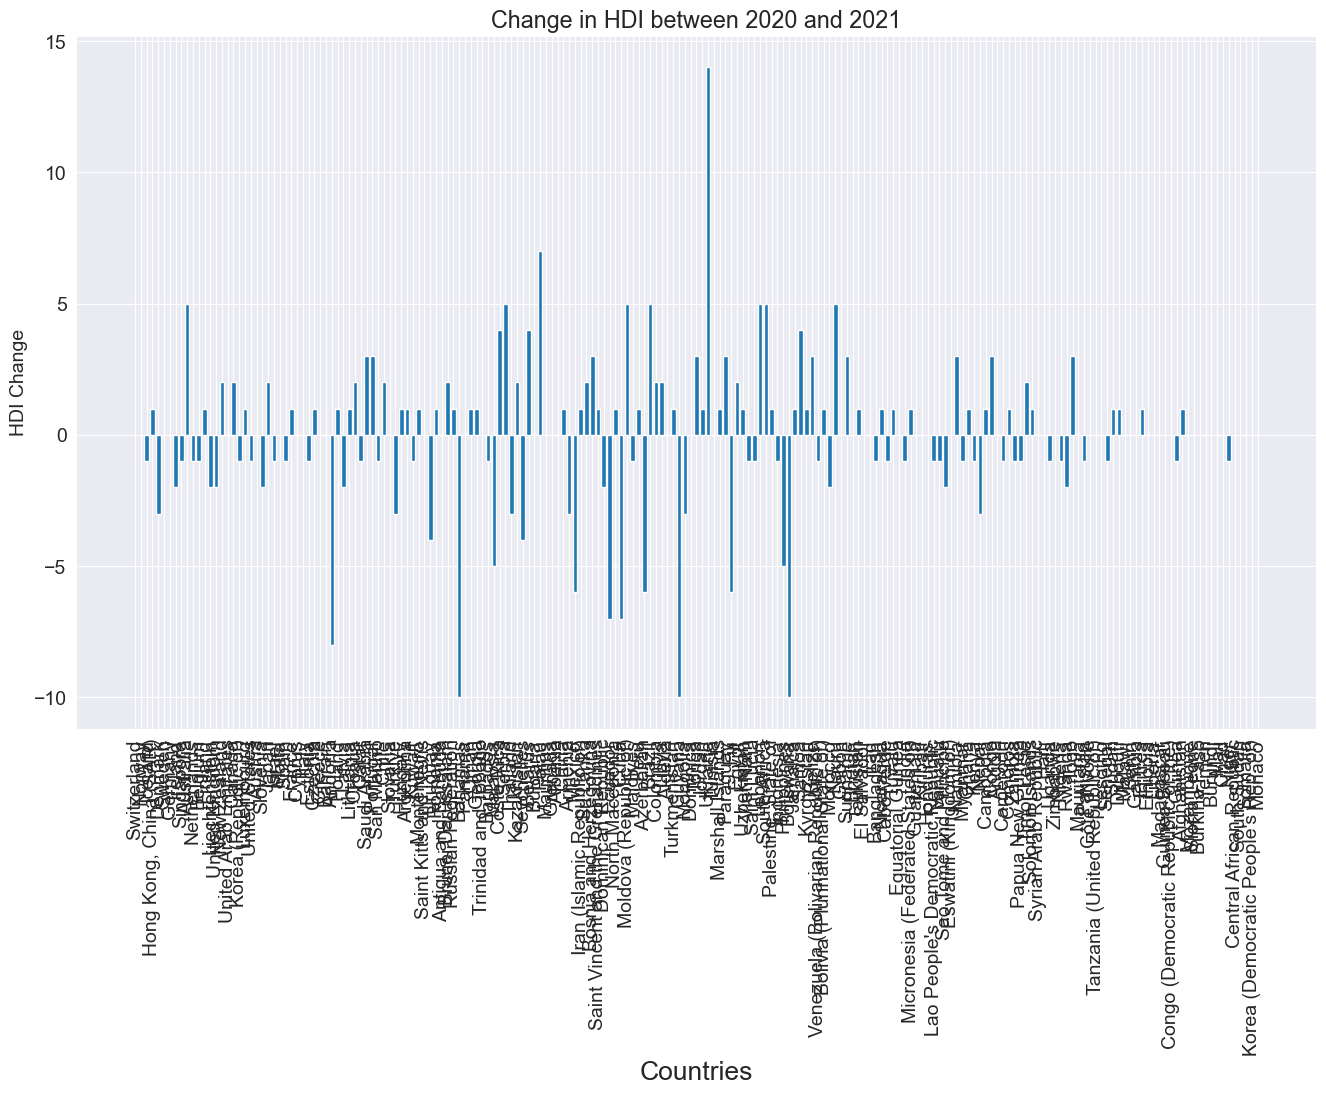

In [30]:
plt.figure(figsize=(16,9))

# Create a new column with the change in HDI between 2020 and 2021
dff['HDI_change'] = dff['HDI rank'] - dff['HDI_2021']

# Create a bar chart of the HDI change for each country
plt.bar(dff['Country'], dff['HDI_change'])


# Set the axis labels and title
plt.xlabel('Countries', fontsize=19)
plt.ylabel('HDI Change')
plt.title('Change in HDI between 2020 and 2021')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

C:\Users\AYUSH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


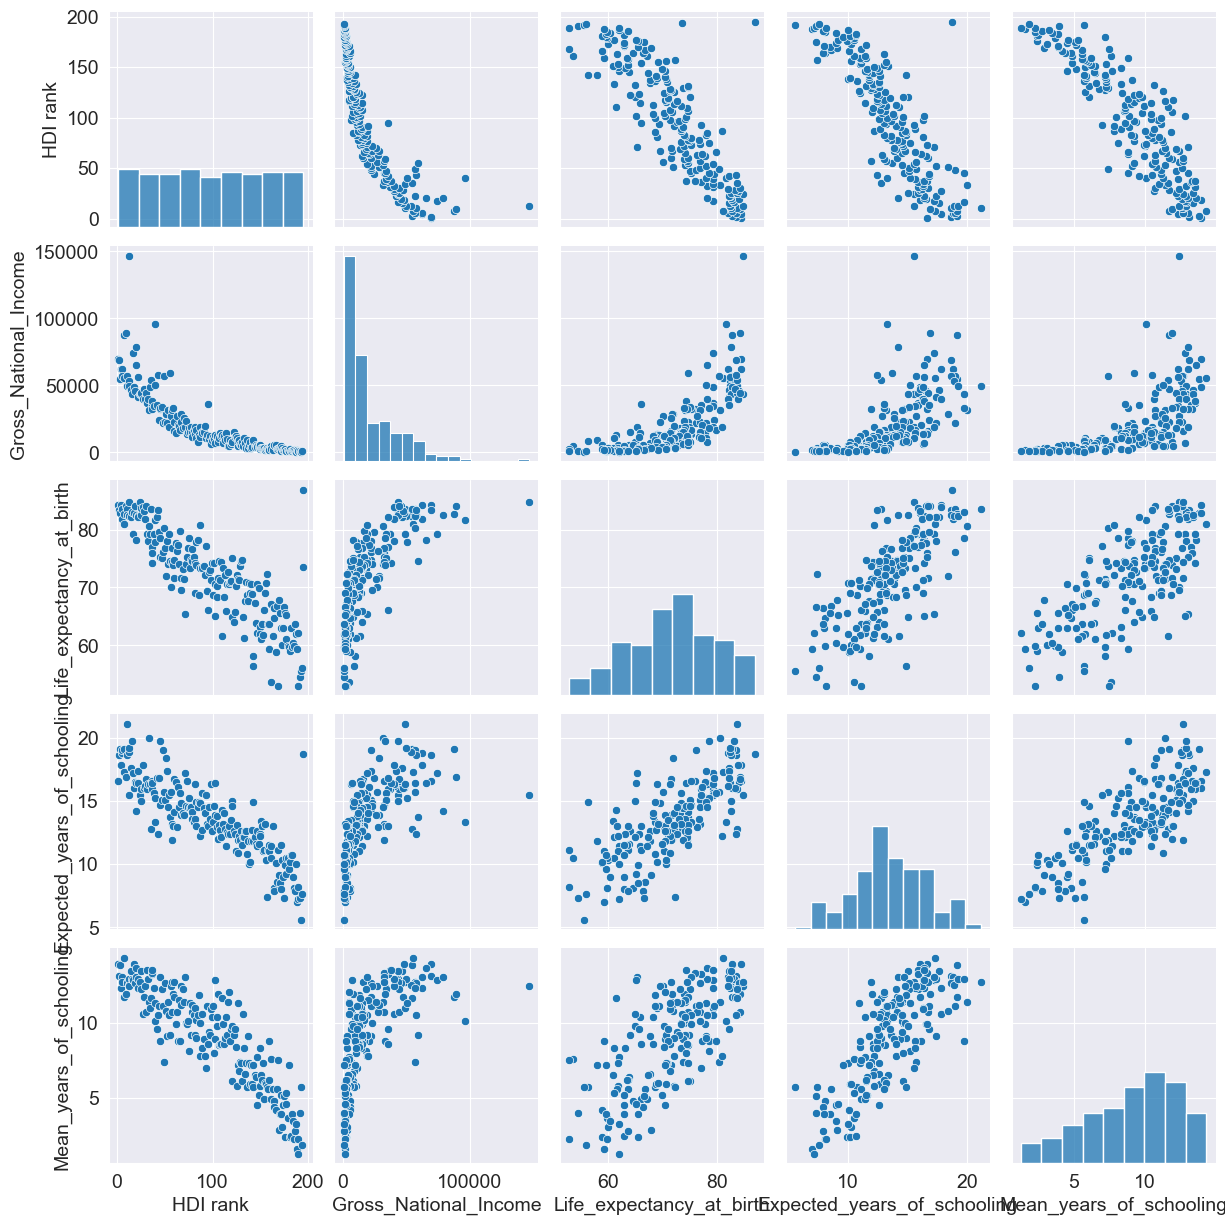

In [32]:

# Create a pairplot to visualize the correlation between variables
sns.pairplot(dff, vars=['HDI rank', 'Gross_National_Income', 'Life_expectancy_at_birth', 'Expected_years_of_schooling', 'Mean_years_of_schooling'])

# Show the plot
plt.show()

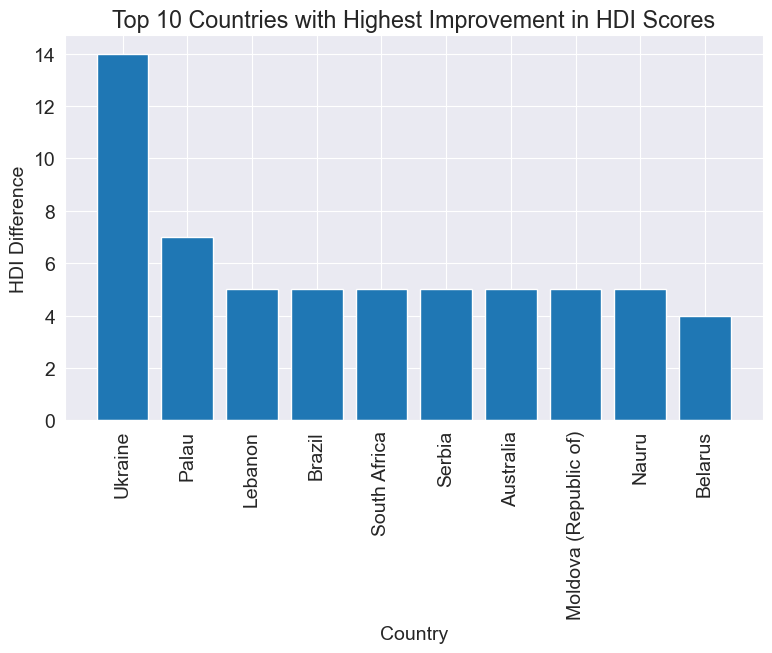

In [33]:
# Difference in HDI scores between 2021 and 2020
dff['HDI_diff'] = dff['HDI rank'] - dff['HDI_2021']

# Sort the dataframe by HDI difference
dff = dff.sort_values(by='HDI_diff', ascending=False)

# Select the top 10 countries with the highest HDI difference
top_10 = dff.head(10)

# Visualize the results with a bar chart
plt.bar(top_10['Country'], top_10['HDI_diff'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('HDI Difference')
plt.title('Top 10 Countries with Highest Improvement in HDI Scores')
plt.show()

C:\Users\AYUSH\AppData\Local\Temp\ipykernel_24024\3372160616.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


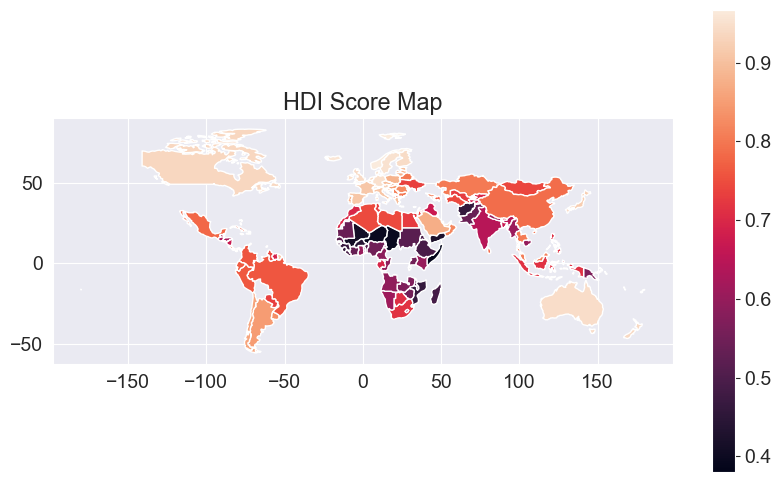

In [34]:
# let's visualize this with a choropleth map
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge HDI data with world map data
merged = world.merge(dff, left_on='name', right_on='Country')

fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='Human_Development_Index_(HDI)', ax=ax, legend=True)
ax.set_title('HDI Score Map')
plt.show()

In [35]:
#pip install geopandas

In [54]:

print('\n\n\nNumber of Countries which had the same performance last year = ',dff[dff['HDI rank'] == dff['HDI_2021']].value_counts().sum(),'Coutries','\n')

dff[dff['HDI rank'] == dff['HDI_2021']].head()




Number of Countries which had the same performance last year =  58 Coutries 



,HDI rank,Continent,Country,Human_Development_Index_(HDI),Life_expectancy_at_birth,...,Mean_years_of_schooling,Gross_National_Income,HDI_2021,HDI_change,HDI_diff
191,192,Africa,South Sudan,0.381,55.6,...,5.7,691.0,192,0,0
192,193,Africa,Somalia,0.380,56.1,...,1.9,1072.0,193,0,0
193,194,None,Korea (Democratic People's Rep. of),NaN,73.6,...,NaN,NaN,194,0,0
124,125,Asia,Bhutan,0.681,72.2,...,5.8,10625.0,125,0,0
188,189,Africa,Chad,0.394,53.0,...,2.3,1389.0,189,0,0


In [37]:
dff.groupby('Continent')[['Gross_National_Income','Life_expectancy_at_birth','Expected_years_of_schooling']].mean()

,Gross_National_Income,Life_expectancy_at_birth,Expected_years_of_schooling
Continent,,,
Africa,5622.127273,63.383636,10.881818
Asia,22928.044444,74.142222,13.304444
Europe,42877.133333,79.200000,16.236957
North America,19068.363636,74.018182,14.022727
Oceania,12696.714286,70.285714,14.228571
South America,16362.583333,72.900000,14.941667
